Epoch [100/1000], Loss: 161.7688
Epoch [200/1000], Loss: 160.8585
Epoch [300/1000], Loss: 160.5843
Epoch [400/1000], Loss: 160.4743
Epoch [500/1000], Loss: 160.4697
Epoch [600/1000], Loss: 160.3178
Epoch [700/1000], Loss: 160.3258
Epoch [800/1000], Loss: 160.3235
Epoch [900/1000], Loss: 160.2982
Epoch [1000/1000], Loss: 160.2947

Test Loss: 232.9937


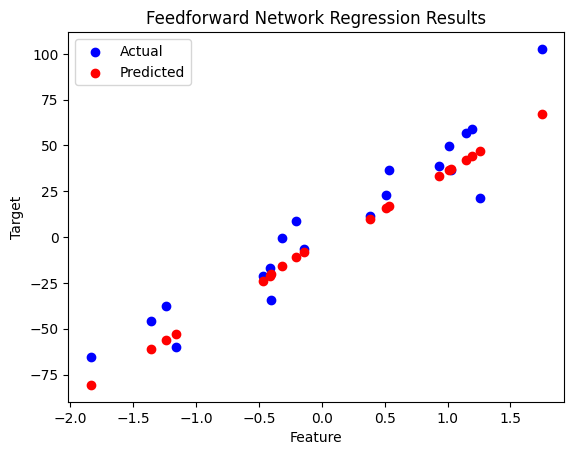

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset for regression
X, y = make_regression(n_samples=100, n_features=1, noise=15.0, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple feedforward neural network with one hidden layer
class FeedForwardNetwork(nn.Module):
    def __init__(self):
        super(FeedForwardNetwork, self).__init__()
        self.hidden = nn.Linear(1, 10)  # 1 input feature, 10 hidden units
        self.relu = nn.ReLU()            # ReLU activation
        self.output = nn.Linear(10, 1)   # Output layer with 1 output unit (regression)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Create the network
net = FeedForwardNetwork()

# Define the loss function (Mean Squared Error for regression)
loss_fn = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Number of epochs for training
num_epochs = 1000

# Training loop with backpropagation
for epoch in range(num_epochs):
    # Forward propagation
    y_pred = net(X_train)
    
    # Compute loss
    loss = loss_fn(y_pred, y_train)
    
    # Backward propagation (compute gradients and update weights)
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute gradients via backpropagation
    optimizer.step()       # Update weights
    
    # Display loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Test the network
with torch.no_grad():
    y_test_pred = net(X_test)
    test_loss = loss_fn(y_test_pred, y_test)

print(f"\nTest Loss: {test_loss.item():.4f}")

# Plot the results
plt.scatter(X_test.numpy(), y_test.numpy(), color='blue', label='Actual')
plt.scatter(X_test.numpy(), y_test_pred.numpy(), color='red', label='Predicted')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Feedforward Network Regression Results")
plt.legend()
plt.show()
